# AI Hack Tunisia 2022

### Importing libraries

In [2]:
#data processing and visualization
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns


#scikit-learn
!pip install sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import export_graphviz 
from sklearn.preprocessing import LabelEncoder


#regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as XGBRegressor
import xgboost as xg
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn import neighbors


#evaluation matrices
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error, r2_score
import math
from math import sqrt
from sklearn.metrics import log_loss , accuracy_score
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score



import warnings
warnings.simplefilter('ignore')

### Importing data

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
stores = pd.read_csv("stores.csv")
dates = pd.read_csv("dates.csv")
holidays = pd.read_csv("holidays.csv")

##### Train

In [4]:
train.drop("nbr_of_transactions", axis=1, inplace=True)
train

,date,store_id,category_id,target,onpromotion
0,365,store_1,category_24,0.000,0
1,365,store_1,category_21,0.000,0
2,365,store_1,category_32,0.000,0
3,365,store_1,category_18,0.000,0
4,365,store_1,category_26,0.000,0
...,...,...,...,...,...
2248879,1626,store_9,category_23,539.725,0
2248880,1626,store_9,category_20,84.177,0
2248881,1626,store_9,category_15,1973.760,3
2248882,1626,store_9,category_29,2.000,0


##### Test

In [5]:
test

,date,store_id,category_id,onpromotion
0,1627,store_1,category_24,0
1,1627,store_1,category_21,0
2,1627,store_1,category_32,0
3,1627,store_1,category_18,16
4,1627,store_1,category_26,0
...,...,...,...,...
99787,1682,store_9,category_23,0
99788,1682,store_9,category_20,1
99789,1682,store_9,category_15,7
99790,1682,store_9,category_29,8


##### Stores

In [6]:
print(stores.head())
print(len(stores))
print("Unique store ids in train:", len(train.store_id.unique()))
print("Unique store ids in test:", len(test.store_id.unique()))

  store_id  city  type  cluster
0  store_1     0     0        0
1  store_2     0     0        0
2  store_3     0     0        1
3  store_4     0     0        2
4  store_5     1     0        3
54
Unique store ids in train: 54
Unique store ids in test: 54


##### Dates

In [7]:
dates.head()

,date,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear
0,365,1,1,1,2,1,1,1,True,False,True,False,True,False,101
1,366,1,1,2,3,2,1,1,False,False,False,False,False,False,101
2,367,1,1,3,4,3,1,1,False,False,False,False,False,False,101
3,368,1,1,4,5,4,1,1,False,False,False,False,False,False,101
4,369,1,1,5,6,5,1,1,False,False,False,False,False,False,101


In [8]:
dates['year_weekofyear'].unique()

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
       227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
       240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252,
       253, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412,
       413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 42

###### Holidays

In [9]:
holidays.columns = holidays.columns.str.replace('type', 'holiday_type')
holidays.head()

,date,holiday_type
0,1,0
1,5,4
2,12,4
3,42,0
4,43,0


In [10]:
holidays["holiday_type"] = holidays["holiday_type"].astype("category")

In [11]:
holidays = pd.concat([holidays['date'], pd.get_dummies(holidays[["holiday_type"]])], axis=1)

In [12]:
holidays

,date,holiday_type_0,holiday_type_1,holiday_type_2,holiday_type_3,holiday_type_4,holiday_type_5
0,1,1,0,0,0,0,0
1,5,0,0,0,0,1,0
2,12,0,0,0,0,1,0
3,42,1,0,0,0,0,0
4,43,1,0,0,0,0,0
...,...,...,...,...,...,...,...
276,1663,0,0,1,0,0,0
277,1674,1,0,0,0,0,0
278,1679,1,0,0,0,0,0
279,1680,0,1,0,0,0,0


###### Joining data

In [13]:
# train and dates
merged_train = train.merge(dates, how='left', on="date")

# test and dates
merged_test = test.merge(dates, how='left', on="date")

# train and stores
merged_train = merged_train.merge(stores, how='left', on="store_id")

# test and stores
merged_test = merged_test.merge(stores, how='left', on="store_id")

# holidays
merged_train['is_holiday'] = merged_train[['date']].isin(holidays['date'].tolist())
merged_test['is_holiday'] = merged_test[['date']].isin(holidays['date'].tolist())
merged_train = merged_train.merge(holidays, how='left', on="date")
merged_test = merged_test.merge(holidays, how='left', on="date")

In [14]:
merged_train = merged_train.fillna(0)
merged_test = merged_test.fillna(0)

In [15]:
merged_train.columns

Index(['date', 'store_id', 'category_id', 'target', 'onpromotion', 'year',
       'month', 'dayofmonth', 'dayofweek', 'dayofyear', 'weekofyear',
       'quarter', 'is_month_start', 'is_month_end', 'is_quarter_start',
       'is_quarter_end', 'is_year_start', 'is_year_end', 'year_weekofyear',
       'city', 'type', 'cluster', 'is_holiday', 'holiday_type_0',
       'holiday_type_1', 'holiday_type_2', 'holiday_type_3', 'holiday_type_4',
       'holiday_type_5'],
      dtype='object')

### Checking for null values

In [16]:
# Train
print("Train:\n", merged_train.isnull().sum(axis=0))

# Test
print("\nTest:\n", merged_test.isnull().sum(axis=0))

Train:
 date                0
store_id            0
category_id         0
target              0
onpromotion         0
year                0
month               0
dayofmonth          0
dayofweek           0
dayofyear           0
weekofyear          0
quarter             0
is_month_start      0
is_month_end        0
is_quarter_start    0
is_quarter_end      0
is_year_start       0
is_year_end         0
year_weekofyear     0
city                0
type                0
cluster             0
is_holiday          0
holiday_type_0      0
holiday_type_1      0
holiday_type_2      0
holiday_type_3      0
holiday_type_4      0
holiday_type_5      0
dtype: int64

Test:
 date                0
store_id            0
category_id         0
onpromotion         0
year                0
month               0
dayofmonth          0
dayofweek           0
dayofyear           0
weekofyear          0
quarter             0
is_month_start      0
is_month_end        0
is_quarter_start    0
is_quarter_end      0
is_

### Type conversion

In [17]:
# Train
merged_train['is_month_start'] = merged_train['is_month_start'].astype(int)               
merged_train['is_month_end'] = merged_train['is_month_end'].astype(int)
merged_train['is_quarter_start'] = merged_train['is_quarter_start'].astype(int)  
merged_train['is_quarter_end'] = merged_train['is_quarter_end'].astype(int)  
merged_train['is_year_start'] = merged_train['is_year_start'].astype(int)  
merged_train['is_year_end'] = merged_train['is_year_end'].astype(int)
merged_train['store_id'] = merged_train['store_id'].str[6:]
merged_train['category_id'] = merged_train['category_id'].str[9:]
merged_train['store_id'] = merged_train['store_id'].astype(int)
merged_train['category_id'] = merged_train['category_id'].astype(int)
merged_train['is_holiday'] = merged_train['is_holiday'].astype(int)

# Test
merged_test['is_month_start'] = merged_test['is_month_start'].astype(int)               
merged_test['is_month_end'] = merged_test['is_month_end'].astype(int)
merged_test['is_quarter_start'] = merged_test['is_quarter_start'].astype(int)  
merged_test['is_quarter_end'] = merged_test['is_quarter_end'].astype(int)  
merged_test['is_year_start'] = merged_test['is_year_start'].astype(int)  
merged_test['is_year_end'] = merged_test['is_year_end'].astype(int)
merged_test['store_id'] = merged_test['store_id'].str[6:]
merged_test['category_id'] = merged_test['category_id'].str[9:]
merged_test['store_id'] = merged_test['store_id'].astype(int)
merged_test['category_id'] = merged_test['category_id'].astype(int)
merged_test['is_holiday'] = merged_test['is_holiday'].astype(int)

In [18]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2288088 entries, 0 to 2288087
Data columns (total 29 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              int64  
 1   store_id          int32  
 2   category_id       int32  
 3   target            float64
 4   onpromotion       int64  
 5   year              int64  
 6   month             int64  
 7   dayofmonth        int64  
 8   dayofweek         int64  
 9   dayofyear         int64  
 10  weekofyear        int64  
 11  quarter           int64  
 12  is_month_start    int32  
 13  is_month_end      int32  
 14  is_quarter_start  int32  
 15  is_quarter_end    int32  
 16  is_year_start     int32  
 17  is_year_end       int32  
 18  year_weekofyear   int64  
 19  city              int64  
 20  type              int64  
 21  cluster           int64  
 22  is_holiday        int32  
 23  holiday_type_0    float64
 24  holiday_type_1    float64
 25  holiday_type_2    float64
 26  holiday_type_3

In [19]:
merged_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105138 entries, 0 to 105137
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              105138 non-null  int64  
 1   store_id          105138 non-null  int32  
 2   category_id       105138 non-null  int32  
 3   onpromotion       105138 non-null  int64  
 4   year              105138 non-null  int64  
 5   month             105138 non-null  int64  
 6   dayofmonth        105138 non-null  int64  
 7   dayofweek         105138 non-null  int64  
 8   dayofyear         105138 non-null  int64  
 9   weekofyear        105138 non-null  int64  
 10  quarter           105138 non-null  int64  
 11  is_month_start    105138 non-null  int32  
 12  is_month_end      105138 non-null  int32  
 13  is_quarter_start  105138 non-null  int32  
 14  is_quarter_end    105138 non-null  int32  
 15  is_year_start     105138 non-null  int32  
 16  is_year_end       10

In [20]:
merged_test

,date,store_id,category_id,onpromotion,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,...,city,type,cluster,is_holiday,holiday_type_0,holiday_type_1,holiday_type_2,holiday_type_3,holiday_type_4,holiday_type_5
0,1627,1,24,0,4,6,19,0,170,25,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1627,1,21,0,4,6,19,0,170,25,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,1627,1,32,0,4,6,19,0,170,25,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,1627,1,18,16,4,6,19,0,170,25,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,1627,1,26,0,4,6,19,0,170,25,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105133,1682,9,23,0,4,8,13,6,225,32,...,0,1,4,0,0.0,0.0,0.0,0.0,0.0,0.0
105134,1682,9,20,1,4,8,13,6,225,32,...,0,1,4,0,0.0,0.0,0.0,0.0,0.0,0.0
105135,1682,9,15,7,4,8,13,6,225,32,...,0,1,4,0,0.0,0.0,0.0,0.0,0.0,0.0
105136,1682,9,29,8,4,8,13,6,225,32,...,0,1,4,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
merged_train[(merged_train['year']==1) & (merged_train['weekofyear']==1) & (merged_train['store_id']==1) & (merged_train['category_id']==1)]['target'].sum()

14.0

In [22]:
merged_train

,date,store_id,category_id,target,onpromotion,year,month,dayofmonth,dayofweek,dayofyear,...,city,type,cluster,is_holiday,holiday_type_0,holiday_type_1,holiday_type_2,holiday_type_3,holiday_type_4,holiday_type_5
0,365,1,24,0.000,0,1,1,1,2,1,...,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
1,365,1,21,0.000,0,1,1,1,2,1,...,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
2,365,1,32,0.000,0,1,1,1,2,1,...,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
3,365,1,18,0.000,0,1,1,1,2,1,...,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
4,365,1,26,0.000,0,1,1,1,2,1,...,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288083,1626,9,23,539.725,0,4,6,18,6,169,...,0,1,4,0,0.0,0.0,0.0,0.0,0.0,0.0
2288084,1626,9,20,84.177,0,4,6,18,6,169,...,0,1,4,0,0.0,0.0,0.0,0.0,0.0,0.0
2288085,1626,9,15,1973.760,3,4,6,18,6,169,...,0,1,4,0,0.0,0.0,0.0,0.0,0.0,0.0
2288086,1626,9,29,2.000,0,4,6,18,6,169,...,0,1,4,0,0.0,0.0,0.0,0.0,0.0,0.0


###### Dropping day columns

In [23]:
merged_train.drop(['date', 'dayofmonth', 'dayofweek', 'dayofyear', 'year_weekofyear', 'month', 'is_year_start', 'is_month_start'], axis=1, inplace=True)
merged_test.drop(['date', 'dayofmonth', 'dayofweek', 'dayofyear', 'year_weekofyear', 'month', 'is_year_start', 'is_month_start'], axis=1, inplace=True)

In [24]:
merged_train = merged_train.groupby(by=['year', 'weekofyear', 'store_id', 'category_id',], axis=0).agg(func=np.mean)

In [25]:
merged_test = merged_test.groupby(by=['year', 'weekofyear', 'store_id', 'category_id'], axis=0).agg(func=np.mean)

In [26]:
merged_train

target  onpromotion  quarter  \
year weekofyear store_id category_id                                  
1    1          1        0             17.125          0.0    2.125   
                         1              1.750          0.0    2.125   
                         2             18.625          0.0    2.125   
                         3             15.375          0.0    2.125   
                         4            100.033          0.5    2.125   
...                                       ...          ...      ...   
4    52         54       28             0.000          0.0    1.000   
                         29             0.000          0.0    1.000   
                         30             0.000          0.0    1.000   
                         31             0.000          0.0    1.000   
                         32             0.000          0.0    1.000   

                                      is_month_end  is_quarter_start  \
year weekofyear store_id category_id                                   
1    1          1        0                   0.125             0.125   
                         1                   0.125             0.125   
                         2                   0.125             0.125   
                         3                   0.125             0.125   
                         4                   0.125             0.125   
...                                            ...               ...   
4    52         54       28                  0.000             1.000   
                         29                  0.000             1.000   
                         30                  0.000             1.000   
                         31                  0.000             1.000   
                         32                  0.000             1.000   

                                      is_quarter_end  is_year_end  city  type  \
year weekofyear store_id category_id                                            
1    1          1        0                     0.125        0.125   0.0   0.0   
                         1                     0.125        0.125   0.0   0.0   
                         2                     0.125        0.125   0.0   0.0   
                         3                     0.125        0.125   0.0   0.0   
                         4                     0.125        0.125   0.0   0.0   
...                                              ...          ...   ...   ...   
4    52         54       28                    0.000        0.000  21.0   2.0   
                         29                    0.000        0.000  21.0   2.0   
                         30                    0.000        0.000  21.0   2.0   
                         31                    0.000        0.000  21.0   2.0   
                         32                    0.000        0.000  21.0   2.0   

                                      cluster  is_holiday  holiday_type_0  \
year weekofyear store_id category_id                                        
1    1          1        0                0.0        0.25           0.125   
                         1                0.0        0.25           0.125   
                         2                0.0        0.25           0.125   
                         3                0.0        0.25           0.125   
                         4                0.0        0.25           0.125   
...                                       ...         ...             ...   
4    52         54       28               7.0        1.00           1.000   
                         29               7.0        1.00           1.000   
                         30               7.0        1.00           1.000   
                         31               7.0        1.00           1.000   
                         32               7.0        1.00           1.000   

                                      holiday_type_1  holiday_type_2  \
year weekofyear store_id category_id              

In [28]:
merged_train[["target"]] *= 7

In [29]:
#merged_train = merged_train[['target', 'onpromotion', 'month', 'dayofyear', 'city', 'type', 'cluster']]

In [30]:
#merged_test = merged_test[['onpromotion', 'month', 'dayofyear', 'city', 'type', 'cluster']]

In [31]:
merged_test.index

MultiIndex([(4, 25,  1,  0),
            (4, 25,  1,  1),
            (4, 25,  1,  2),
            (4, 25,  1,  3),
            (4, 25,  1,  4),
            (4, 25,  1,  5),
            (4, 25,  1,  6),
            (4, 25,  1,  7),
            (4, 25,  1,  8),
            (4, 25,  1,  9),
            ...
            (4, 32, 54, 23),
            (4, 32, 54, 24),
            (4, 32, 54, 25),
            (4, 32, 54, 26),
            (4, 32, 54, 27),
            (4, 32, 54, 28),
            (4, 32, 54, 29),
            (4, 32, 54, 30),
            (4, 32, 54, 31),
            (4, 32, 54, 32)],
           names=['year', 'weekofyear', 'store_id', 'category_id'], length=14256)

In [32]:
merged_train

target  onpromotion  quarter  \
year weekofyear store_id category_id                                   
1    1          1        0             839.125          0.0    2.125   
                         1              85.750          0.0    2.125   
                         2             912.625          0.0    2.125   
                         3             753.375          0.0    2.125   
                         4            4901.617          0.5    2.125   
...                                        ...          ...      ...   
4    52         54       28              0.000          0.0    1.000   
                         29              0.000          0.0    1.000   
                         30              0.000          0.0    1.000   
                         31              0.000          0.0    1.000   
                         32              0.000          0.0    1.000   

                                      is_month_end  is_quarter_start  \
year weekofyear store_id category_id                                   
1    1          1        0                   0.125             0.125   
                         1                   0.125             0.125   
                         2                   0.125             0.125   
                         3                   0.125             0.125   
                         4                   0.125             0.125   
...                                            ...               ...   
4    52         54       28                  0.000             1.000   
                         29                  0.000             1.000   
                         30                  0.000             1.000   
                         31                  0.000             1.000   
                         32                  0.000             1.000   

                                      is_quarter_end  is_year_end  city  type  \
year weekofyear store_id category_id                                            
1    1          1        0                     0.125        0.125   0.0   0.0   
                         1                     0.125        0.125   0.0   0.0   
                         2                     0.125        0.125   0.0   0.0   
                         3                     0.125        0.125   0.0   0.0   
                         4                     0.125        0.125   0.0   0.0   
...                                              ...          ...   ...   ...   
4    52         54       28                    0.000        0.000  21.0   2.0   
                         29                    0.000        0.000  21.0   2.0   
                         30                    0.000        0.000  21.0   2.0   
                         31                    0.000        0.000  21.0   2.0   
                         32                    0.000        0.000  21.0   2.0   

                                      cluster  is_holiday  holiday_type_0  \
year weekofyear store_id category_id                                        
1    1          1        0                0.0        0.25           0.125   
                         1                0.0        0.25           0.125   
                         2                0.0        0.25           0.125   
                         3                0.0        0.25           0.125   
                         4                0.0        0.25           0.125   
...                                       ...         ...             ...   
4    52         54       28               7.0        1.00           1.000   
                         29               7.0        1.00           1.000   
                         30               7.0        1.00           1.000   
                         31               7.0        1.00           1.000   
                         32               7.0        1.00           1.000   

                                      holiday_type_1  holiday_type_2  \
year weekofyear store_id category_id  

In [33]:
merged_train = merged_train.round()
merged_train = merged_train.astype(int)

merged_test = merged_test.round()
merged_test = merged_test.astype(int)

In [34]:
merged_train[['quarter', 'city', 'type', 'cluster']] = merged_train[['quarter', 'city', 'type', 'cluster']].astype("category")
merged_train = pd.concat([merged_train, pd.get_dummies(merged_train[['quarter', 'city', 'type', 'cluster']])], axis=1)

merged_test[['quarter', 'city', 'type', 'cluster']] = merged_test[['quarter', 'city', 'type', 'cluster']].astype("category")
merged_test = pd.concat([merged_test, pd.get_dummies(merged_test[['quarter', 'city', 'type', 'cluster']])], axis=1)
merged_test['quarter_1'] = [0]*len(merged_test)
merged_test['quarter_4'] = [0]*len(merged_test)

In [35]:
merged_train.drop(['quarter', 'city', 'type', 'cluster'], axis=1, inplace=True)
merged_test.drop(['quarter', 'city', 'type', 'cluster'], axis=1, inplace=True)

In [36]:
merged_test

onpromotion  is_month_end  \
year weekofyear store_id category_id                              
4    25         1        0                      3             0   
                         1                      0             0   
                         2                      0             0   
                         3                      0             0   
                         4                      7             0   
...                                           ...           ...   
     32         54       28                     0             0   
                         29                     0             0   
                         30                     0             0   
                         31                     6             0   
                         32                     0             0   

                                      is_quarter_start  is_quarter_end  \
year weekofyear store_id category_id                                     
4    25         1        0                           0               0   
                         1                           0               0   
                         2                           0               0   
                         3                           0               0   
                         4                           0               0   
...                                                ...             ...   
     32         54       28                          0               0   
                         29                          0               0   
                         30                          0               0   
                         31                          0               0   
                         32                          0               0   

                                      is_year_end  is_holiday  holiday_type_0  \
year weekofyear store_id category_id                                            
4    25         1        0                      0           0               0   
                         1                      0           0               0   
                         2                      0           0               0   
                         3                      0           0               0   
                         4                      0           0               0   
...                                           ...         ...             ...   
     32         54       28                     0           0               0   
                         29                     0           0               0   
                         30                     0           0               0   
                         31                     0           0               0   
                         32                     0           0               0   

                                      holiday_type_1  holiday_type_2  \
year weekofyear store_id category_id                                   
4    25         1        0                         0               0   
                         1                         0               0   
                         2                         0               0   
                         3                         0               0   
                         4                         0               0   
...                                              ...             ...   
     32         54       28                        0               0   
                         29                        0               0   
                         30                        0               0   
                         31                        0               0   
                         32                        0               0   

                                      holiday_type_3  ...  cluster_9  \
year weekofyear store_id category_id                  ...              
4    25         1        0                         0  ...          0

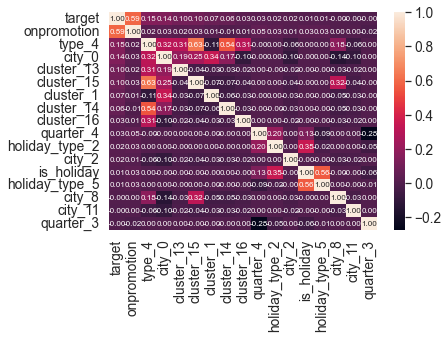

In [37]:
correlation = merged_train.corr()

k = 17
cols = correlation.nlargest(k, 'target')['target'].index
cm = np.corrcoef(merged_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Model

In [38]:
#splitting data into X_train, X_test, y_train, y_test
training_data = merged_train
X = training_data.drop(['target'], axis = 1)
y = training_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(260884, 60) (65222, 60)
(260884,) (65222,)


In [39]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [40]:
from sklearn import datasets, ensemble

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 1374344555.6510


In [41]:
'''
model = xg.XGBRegressor(params = {
    'min_child_weight': [4, 5],
    'gamma': [i / 10.0 for i in range(3, 6)],
    'subsample': [i / 10.0 for i in range(6, 11)],
    'colsample_bytree': [i / 10.0 for i in range(6, 11)],
    'max_depth': [2, 3, 4]
})

 
# Fitting the model
model.fit(X_train, y_train)
 
# Predict the model
pred = model.predict(X_train)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_train, pred))
pred_train_model= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_model)))
'''

pred_test_model= reg.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_model)))

37072.15337218774


In [42]:
#model.get_params()

In [43]:
merged_test

onpromotion  is_month_end  \
year weekofyear store_id category_id                              
4    25         1        0                      3             0   
                         1                      0             0   
                         2                      0             0   
                         3                      0             0   
                         4                      7             0   
...                                           ...           ...   
     32         54       28                     0             0   
                         29                     0             0   
                         30                     0             0   
                         31                     6             0   
                         32                     0             0   

                                      is_quarter_start  is_quarter_end  \
year weekofyear store_id category_id                                     
4    25         1        0                           0               0   
                         1                           0               0   
                         2                           0               0   
                         3                           0               0   
                         4                           0               0   
...                                                ...             ...   
     32         54       28                          0               0   
                         29                          0               0   
                         30                          0               0   
                         31                          0               0   
                         32                          0               0   

                                      is_year_end  is_holiday  holiday_type_0  \
year weekofyear store_id category_id                                            
4    25         1        0                      0           0               0   
                         1                      0           0               0   
                         2                      0           0               0   
                         3                      0           0               0   
                         4                      0           0               0   
...                                           ...         ...             ...   
     32         54       28                     0           0               0   
                         29                     0           0               0   
                         30                     0           0               0   
                         31                     0           0               0   
                         32                     0           0               0   

                                      holiday_type_1  holiday_type_2  \
year weekofyear store_id category_id                                   
4    25         1        0                         0               0   
                         1                         0               0   
                         2                         0               0   
                         3                         0               0   
                         4                         0               0   
...                                              ...             ...   
     32         54       28                        0               0   
                         29                        0               0   
                         30                        0               0   
                         31                        0               0   
                         32                        0               0   

                                      holiday_type_3  ...  cluster_9  \
year weekofyear store_id category_id                  ...              
4    25         1        0                         0  ...          0

In [44]:
set(merged_train.columns) - set(merged_test.columns)

{'target'}

In [45]:
pred_test_model= reg.predict(merged_test)

In [46]:
len(pred_test_model)

14256

In [47]:
pd.Series(pred_test_model)

0        18967.997909
1         2169.497755
2         2169.497755
3         2169.497755
4        27295.077543
             ...     
14251     3005.910781
14252     3005.910781
14253     3005.910781
14254    27178.617125
14255     3005.910781
Length: 14256, dtype: float64

In [48]:
pd.Series(pred_test_model).isnull().sum()

0

In [49]:
SampleSubmission = pd.read_csv('SampleSubmission.csv')

In [50]:
SampleSubmission.target = np.log(pred_test_model+1)

In [51]:
SampleSubmission

,ID,target
0,year_week_425_store_1_category_0,9.850561
1,year_week_426_store_1_category_0,7.682712
2,year_week_427_store_1_category_0,7.682712
3,year_week_428_store_1_category_0,7.682712
4,year_week_429_store_1_category_0,10.214498
...,...,...
14251,year_week_428_store_9_category_9,8.008669
14252,year_week_429_store_9_category_9,8.008669
14253,year_week_430_store_9_category_9,8.008669
14254,year_week_431_store_9_category_9,10.210223


In [52]:
SampleSubmission.isnull().sum()

ID        0
target    0
dtype: int64

In [53]:
m = SampleSubmission.target.mean()

In [54]:
SampleSubmission['target'] = SampleSubmission['target'].fillna(m)

In [55]:
SampleSubmission

,ID,target
0,year_week_425_store_1_category_0,9.850561
1,year_week_426_store_1_category_0,7.682712
2,year_week_427_store_1_category_0,7.682712
3,year_week_428_store_1_category_0,7.682712
4,year_week_429_store_1_category_0,10.214498
...,...,...
14251,year_week_428_store_9_category_9,8.008669
14252,year_week_429_store_9_category_9,8.008669
14253,year_week_430_store_9_category_9,8.008669
14254,year_week_431_store_9_category_9,10.210223


In [56]:
SampleSubmission.to_csv('submission777.csv', index=False)

In [57]:
SampleSubmission[SampleSubmission['target']==0]

,ID,target
